# **Spatial Domain Filters**
**Notebook creado por [Marlon Tecotl](https://www.linkedin.com/in/marlon-tecotl/) para el Master en [Vision Artificial](https://www.techtitute.com/informatica/master/master-vision-artificial) en [Tech](https://www.techtitute.com/) (2024).**


Importamos las librerias

In [ ]:
# importamos las librerias
from mpl_toolkits import mplot3d
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]
import cv2
import numpy as np
import seaborn as sns
from PIL import Image, ImageFilter

###  **Convolución**
En este primer apartado vamos a probar a hacer una convolucion de forma manual. En primer lugar crearemos una matriz de 5x5 con valores random entre 0 y 5 del tipo uint8. A continuación crearemos un kernel de 3x3 con valor 1 en todas sus posiciones.

Para realizar la convolucion utilizaremos la funcion de opencv [cv2.filter2D()](https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html), mas info [aqui](https://programmerclick.com/article/4817500365/)

Para mostrar los valores utilizaremos las confusion matrix de seaborn, podemos seguir la siguiente [doc](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)

Si por ejemplo generamos esta entrada:



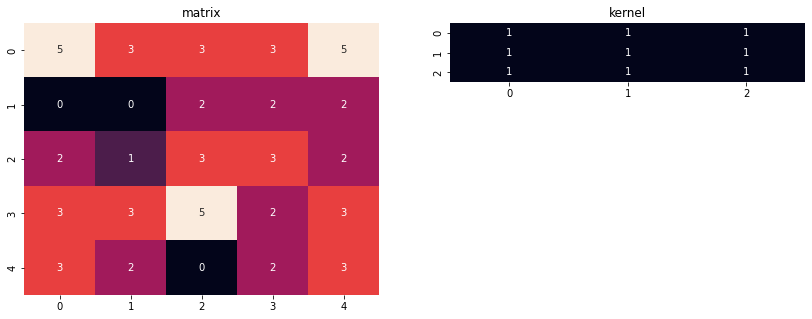

El resultado deberia ser como el siguiente:

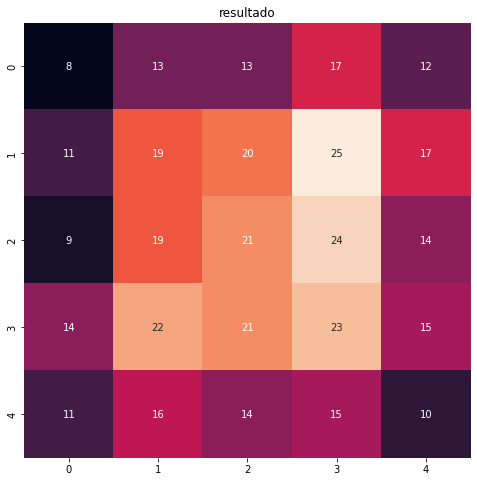

In [ ]:
# definimos la matriz y el kernel
matrix = (np.random.rand(5,5) * 6).astype(np.uint8)
print(f"matrix:\n{matrix}")
kernel = np.ones(9).reshape(3,3).astype(np.uint8)
print(f"kernel:\n{kernel}")

# aplicamos la convolucion
result = cv2.filter2D(matrix, -1, kernel, borderType=cv2.BORDER_CONSTANT)
print(f"result:\n{result}")

# mostramos la matriz y el kernel
plt.figure(figsize=(16, 5))
ax1 = plt.subplot(1,2,1)
plt.title('matrix')
sns.heatmap(matrix, annot=True, cbar = False)
ax2 = plt.subplot(4,2,2)
plt.title('kernel')
sns.heatmap(kernel, annot=True, cbar = False)
axes = [ax1, ax2]
plt.show()

# mostramos el resultado final
plt.title('resultado')
sns.heatmap(result, annot=True, cbar = False)
plt.show()

### **Filtros en dominio de espacio**
En las siguientes actividades vamos a tratar los filtos en el dominio del espacio. 
Podemos consultar el siguiente [link](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html) para la realizacion de la actividad

Para empezar vamos a cargar la siguiente imagen:


In [ ]:
# nombre de la imagen a cargar
image_path = 'data/truck.png'

# cargamos la imagen
image  = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_RGB2GRAY)
plt.imshow(image, cmap='gray')
plt.show()

### **Filtro de media**
Se pide aplicar sobre la imagen de entrada un filtro de media de 7x7 usando el metodo cv2.filter2D(). Mostrar el kernel usando seaborn y la imagen resultante al aplicar el filtro.

In [ ]:
# definimos el tamaño del kernel
kernel_size = (7,7)

# creamos el filtro
numerador = np.ones(kernel_size,np.float32)
print(f"Numerador:\n{numerador}")

denominador = kernel_size[0] * kernel_size[1]
print(f"Denominador:\n{denominador}")

kernel = np.ones(kernel_size,np.float32)/ (kernel_size[0] * kernel_size[1])
output_image = cv2.filter2D(image,-1,kernel)

# mostramos los resultados
plt.title('kernel')
sns.heatmap(kernel, annot=True, cbar = False)
plt.show()
plt.title('resultado')
plt.imshow(output_image, cmap='gray')
plt.show()

Se pide aplicar sobre la imagen de entrada un filtro de media de 7x7 usando la funcion cv2.blur(). Mostrar la imagen resultante al aplicar el filtro. El resultado debe ser exactamente como el anter

In [ ]:
# aplicamos el filtro de media
output_image = cv2.blur(image,kernel_size)

# mostramos los resultados
plt.imshow(output_image, cmap='gray')
plt.show()

### **Filtro de media ponderada**
Se pide aplicar sobre la imagen de entrada el siguiente filtro usando el metodo cv2.filter2D(). Mostrar el kernel usando seaborn y la imagen resultante al aplicar el filtro.

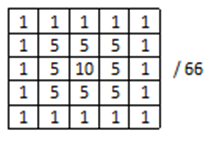

In [ ]:
# definimos el tamaño del kernel
kernel_size = (5,5)

#definimos el kernel
kernel = np.ones((5,5))
print(f"Kernel:\n{kernel}")

kernel2 = np.ones((3,3)) * 5
print(f"Kernel:\n{kernel2}")

kernel[1:4,1:4] = kernel2
kernel[2,2] = 10
kernel = kernel /66
print(f"Kernel Mod:\n{kernel}")

# aplicamos el filtro
output_image = cv2.filter2D(image,-1,kernel)

# mostramos los resultados
plt.title('kernel')
sns.heatmap(kernel, annot=True, cbar = False)
plt.show()
plt.title('resultado')
plt.imshow(output_image, cmap='gray')
plt.show()


### **Filtro gausiano**
Se pide aplicar sobre la imagen de entrada un filtro de gausiano de 7x7 usando el metodo cv2.GaussianBlur(). Mostrar la imagen resultante al aplicar el filtro.

In [ ]:
# aplicamos el filtro y mostramos el resultado
output_image = cv2.GaussianBlur(image,kernel_size,0)
plt.imshow(output_image, cmap='gray')
plt.show()


### **Filtro bilateral**
Se pide aplicar sobre la imagen de entrada un filtro bilateral de 7x7 usando el metodo cv2.bilateralFilter(). Mostrar la imagen resultante al aplicar el filtro.

In [ ]:
# definimos los valores para el filtro
filter_size = 7
sigma_color = 75
sigma_space = 75

# obtenemos y mostramos resultado
output_image = cv2.bilateralFilter(image,filter_size,sigma_color,sigma_space)
plt.imshow(output_image, cmap='gray')
plt.show()

### **Filtro de mediana**
Se pide aplicar sobre la imagen de entrada un filtro mediana de 7x7 usando el metodo cv2.medianBlur(). Mostrar la imagen resultante al aplicar el filtro.

In [ ]:
# aplicamos el filtro y mostramos el resultado
output_image = cv2.medianBlur(image, 7)
plt.imshow(output_image, cmap='gray')
plt.show()

### **Salt and pepper**
Una de las utilidades de usar los filtros anteriores es la eliuminacion de ruido tipo salt and pepper. El siguiente codigo añade ruido a nuestra imagen de entrada

In [ ]:
# Generate Gaussian noise
gauss = np.random.normal(0,1,image.size)
print(image.size)
print(gauss)
gauss = gauss.reshape(image.shape[0],image.shape[1]).astype('uint8')

# Add the Gaussian noise to the image
img_gauss = cv2.add(image,gauss)
plt.imshow(img_gauss, cmap='gray')
plt.show()

### **Reducir ruido**
Se pide aplicar los filtros anteriores y comparar el resultado entre ellos. Cual es el mas efectivo segun tu opinion?

In [ ]:
kernel_size = (7,7)
filter_size = 9
sigma_color = 75
sigma_space = 75

plt.title('blur')
plt.imshow(cv2.blur(img_gauss,kernel_size), cmap='gray')
plt.show()
plt.title('GaussianBlur')
plt.imshow(cv2.GaussianBlur(img_gauss,kernel_size,0), cmap='gray')
plt.show()
plt.title('bilateralFilter')
plt.imshow(cv2.bilateralFilter(img_gauss,filter_size,sigma_color,sigma_space), cmap='gray')
plt.show()
plt.title('medianBlur')
plt.imshow(cv2.medianBlur(image, 7), cmap='gray')
plt.show()

### **Filtro minimo y maximo**
En esta actividad vamos a cambiar de libreria y vamos a usar Pillow para ver los filtros minimo y maximo. Se puede consultar la documentacion en el  siguiente [link](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html).

Se pide aplicar los dos filtros y mostrar los resultados usando numpy.



In [ ]:
# creating a image object
im1 = Image.open(image_path)
   
# applying the min filter
im2 = im1.filter(ImageFilter.MinFilter(size = 5))

plt.imshow(im2, cmap='gray')
plt.show()

In [ ]:
# applying the min filter
im2 = im1.filter(ImageFilter.MaxFilter(size = 5))

plt.imshow(im2, cmap='gray')
plt.show()